# Przygotowanie danych

In [62]:
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd

# Pobieram dane z Kaggle
path = kagglehub.dataset_download(
    "andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews")
print("Ścieżka do plików zestawu danych:", path)

# Wczytanie danych
movies = pd.read_csv(f'{path}/rotten_tomatoes_movies.csv')
reviews = pd.read_csv(f'{path}/rotten_tomatoes_movie_reviews.csv')

# Złączenie dwóch plików
data = pd.merge(movies, reviews, on='id', how='inner')

Ścieżka do plików zestawu danych: C:\Users\tymek\.cache\kagglehub\datasets\andrezaza\clapper-massive-rotten-tomatoes-movies-and-reviews\versions\4


# Podstawowe informacje o zbiorze danych

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469543 entries, 0 to 1469542
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1469543 non-null  object 
 1   title                 1464073 non-null  object 
 2   audienceScore         1399294 non-null  float64
 3   tomatoMeter           1398270 non-null  float64
 4   rating                889498 non-null   object 
 5   ratingContents        889498 non-null   object 
 6   releaseDateTheaters   1184070 non-null  object 
 7   releaseDateStreaming  1355722 non-null  object 
 8   runtimeMinutes        1440071 non-null  float64
 9   genre                 1446093 non-null  object 
 10  originalLanguage      1439891 non-null  object 
 11  director              1460521 non-null  object 
 12  writer                1311318 non-null  object 
 13  boxOffice             1010267 non-null  object 
 14  distributor           1133821 non-

In [64]:
data.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,...,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,...,2739073,2020-10-31,James Mudge,False,4/5,fresh,easternKicks.com,Though let down by its routine love triangle n...,POSITIVE,https://www.easternkicks.com/reviews/love-lies
1,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,...,2333658,2016-06-15,Diva Velez,False,3.5/5,fresh,TheDivaReview.com,"While not perfect, Love, Lies is a worthy disc...",POSITIVE,http://thedivareview.com/Love_Lies_Movie_Revie...
2,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,102694850,2022-05-29,Josh Parham,False,6/10,fresh,Next Best Picture,This is nowhere near the level of other great ...,POSITIVE,https://www.nextbestpicture.com/adrift.html
3,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,102654799,2022-02-11,Cory Woodroof,False,NaN,fresh,615 Film,"Adrift somehow survives the late reveal, and t...",POSITIVE,https://615film.wordpress.com/2018/06/07/the-p...
4,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,2816011,2021-08-21,Kip Mooney,False,C+,rotten,College Movie Review,"For almost the entire runtime, the only people...",NEGATIVE,https://collegemoviereview.com/featured/review...


# Oczyszczenie zbioru z niepotrzebnych kolumn

In [65]:
columns_to_drop = [
    'rating', 'ratingContents',
    'boxOffice', 'writer', 'distributor', 'soundMix', 'reviewState', 'reviewUrl'
]
data = data.drop(columns=columns_to_drop)

# Wyświetlenie danych po usunięciu kolumn

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469543 entries, 0 to 1469542
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1469543 non-null  object 
 1   title                 1464073 non-null  object 
 2   audienceScore         1399294 non-null  float64
 3   tomatoMeter           1398270 non-null  float64
 4   releaseDateTheaters   1184070 non-null  object 
 5   releaseDateStreaming  1355722 non-null  object 
 6   runtimeMinutes        1440071 non-null  float64
 7   genre                 1446093 non-null  object 
 8   originalLanguage      1439891 non-null  object 
 9   director              1460521 non-null  object 
 10  reviewId              1469543 non-null  int64  
 11  creationDate          1469543 non-null  object 
 12  criticName            1469543 non-null  object 
 13  isTopCritic           1469543 non-null  bool   
 14  originalScore         1026708 non-

In [67]:
data.head()

,id,title,audienceScore,tomatoMeter,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,reviewId,creationDate,criticName,isTopCritic,originalScore,publicatioName,reviewText,scoreSentiment
0,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park",2739073,2020-10-31,James Mudge,False,4/5,easternKicks.com,Though let down by its routine love triangle n...,POSITIVE
1,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park",2333658,2016-06-15,Diva Velez,False,3.5/5,TheDivaReview.com,"While not perfect, Love, Lies is a worthy disc...",POSITIVE
2,adrift_2018,Adrift,65.0,69.0,2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",English,Baltasar Kormákur,102694850,2022-05-29,Josh Parham,False,6/10,Next Best Picture,This is nowhere near the level of other great ...,POSITIVE
3,adrift_2018,Adrift,65.0,69.0,2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",English,Baltasar Kormákur,102654799,2022-02-11,Cory Woodroof,False,NaN,615 Film,"Adrift somehow survives the late reveal, and t...",POSITIVE
4,adrift_2018,Adrift,65.0,69.0,2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",English,Baltasar Kormákur,2816011,2021-08-21,Kip Mooney,False,C+,College Movie Review,"For almost the entire runtime, the only people...",NEGATIVE


In [68]:
data.columns

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'releaseDateTheaters',
       'releaseDateStreaming', 'runtimeMinutes', 'genre', 'originalLanguage',
       'director', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'publicatioName', 'reviewText', 'scoreSentiment'],
      dtype='object')

In [69]:
data.describe()

,audienceScore,tomatoMeter,runtimeMinutes,reviewId
count,1.399294e+06,1.398270e+06,1.440071e+06,1.469543e+06
mean,6.525283e+01,6.692012e+01,1.071855e+02,9.074211e+06
std,1.970059e+01,2.607975e+01,2.149446e+01,2.582261e+07
min,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
25%,5.100000e+01,4.800000e+01,9.300000e+01,1.609990e+06
50%,6.800000e+01,7.400000e+01,1.040000e+02,2.200468e+06
75%,8.200000e+01,8.900000e+01,1.180000e+02,2.587848e+06
max,1.000000e+02,1.000000e+02,1.013000e+03,1.027962e+08


***

In [70]:
numeric_features = ['audienceScore', 'tomatoMeter',
                    'runtimeMinutes',]

# Obliczenie podstawowych informacji na temat cech numerycznych

In [71]:
data[numeric_features].min()  # Minimum


audienceScore     0.0
tomatoMeter       0.0
runtimeMinutes    2.0
dtype: float64

In [72]:
data[numeric_features].max()

audienceScore      100.0
tomatoMeter        100.0
runtimeMinutes    1013.0
dtype: float64

In [73]:
data[numeric_features].mean()

audienceScore      65.252827
tomatoMeter        66.920124
runtimeMinutes    107.185486
dtype: float64

In [74]:
data[numeric_features].median()

audienceScore      68.0
tomatoMeter        74.0
runtimeMinutes    104.0
dtype: float64

# Histogramy dla cech numerycznych

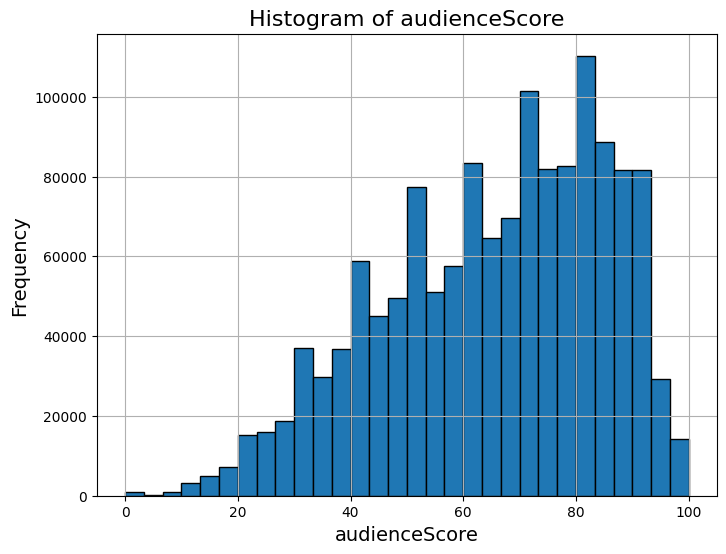

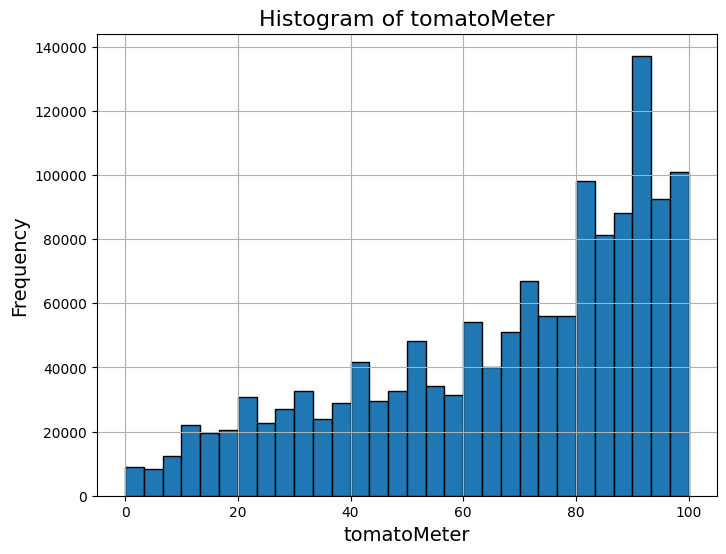

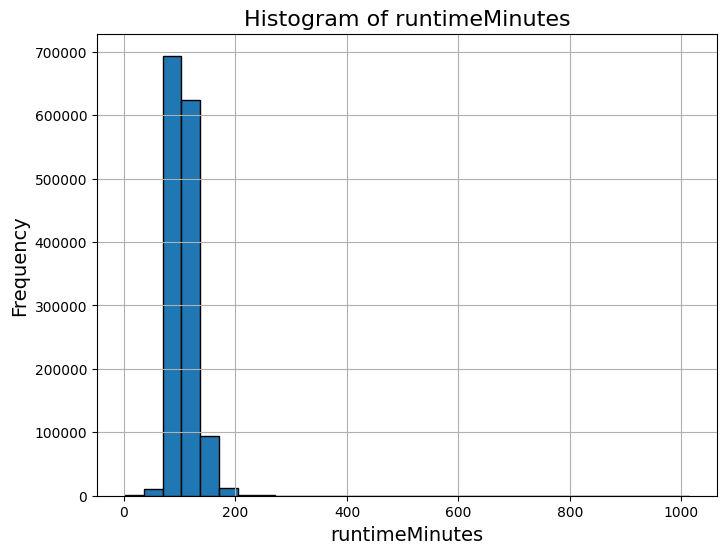

In [75]:
for column in numeric_features:
    plt.figure(figsize=(8, 6))  # Size of each histogram plot
    data[column].hist(bins=30, edgecolor='black')  # Plot histogram
    plt.title(f"Histogram of {column}", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

# Wykres słupkowy dla najczęstszych gatunków

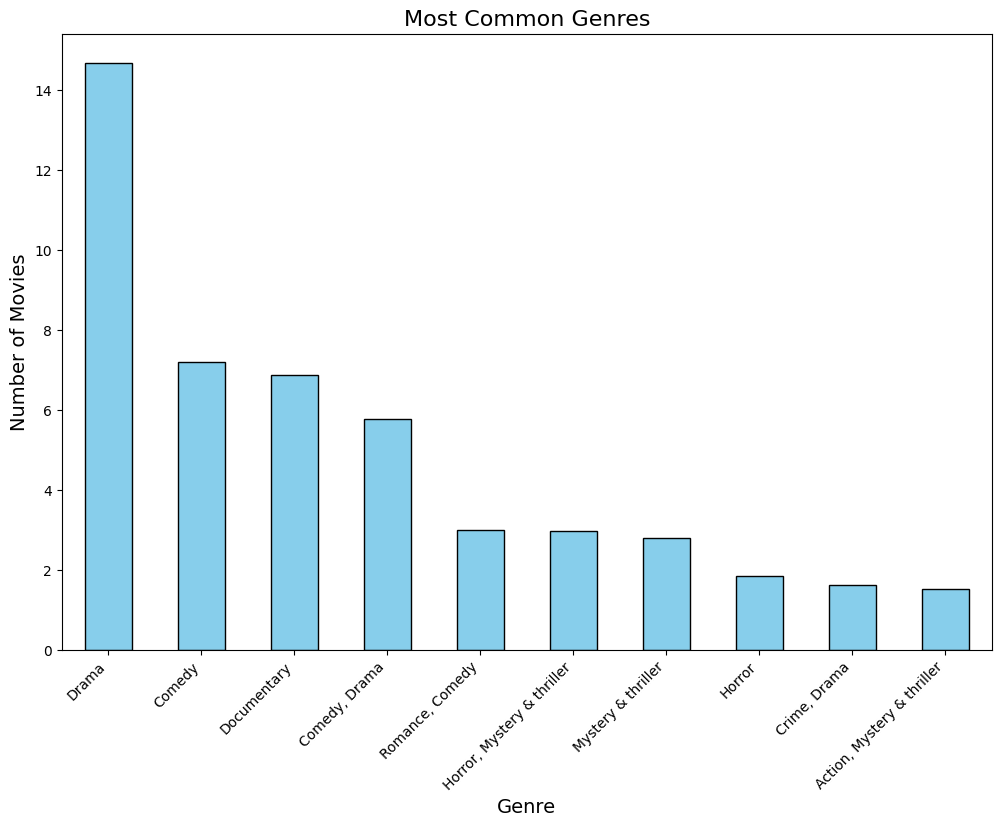

In [ ]:
genre_counts = data['genre'].value_counts()
plt.figure(figsize=(12, 8))  # Size of the plot
(genre_counts.head(10) / genre_counts.sum() * 100).plot(kind='bar', color='skyblue', edgecolor='black')  # Top 10 genres as percentage
plt.title("Most Common Genres", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Percent Movies", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate genre names for readability
plt.show()